<a href="https://colab.research.google.com/github/mmaithani/data-science/blob/main/Gluonts_twitter_volume_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install gluonts

     |████████████████████████████████| 573kB 5.7MB/s 
     |████████████████████████████████| 194kB 19.0MB/s 
     |████████████████████████████████| 8.7MB 16.2MB/s 
  Created wheel for ujson: filename=ujson-1.35-cp36-cp36m-linux_x86_64.whl size=68034 sha256=170e662944b3fefb82cb255a0c01d6cf53ce10bcceece9f3319f2213e06fe7e9
  Stored in directory: /root/.cache/pip/wheels/28/77/e4/0311145b9c2e2f01470e744855131f9e34d6919687550f87d1
Successfully built ujson


In [3]:
pip install mxnet

     |████████████████████████████████| 55.0MB 76kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: gluonts.trainer is deprecated. Use gluonts.mx.trainer instead.
  This is separate from the ipykernel package so we can avoid doing imports until
  0%|          | 0/50 [00:00<?, ?it/s]

learning rate from ``lr_scheduler`` has been overwritten by ``learning_rate`` in optimizer.


100%|██████████| 50/50 [00:03<00:00, 16.10it/s, epoch=10/10, avg_epoch_loss=3.94]


[49.26489  49.644653 43.02694  44.384167 43.330982 43.405052 40.208817
 42.52963  43.958622 41.256424 44.719643 41.40297 ]


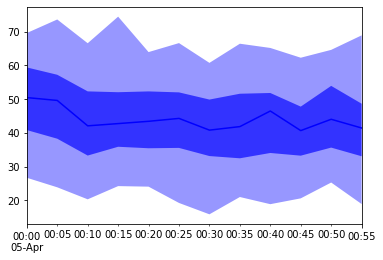

In [4]:
from gluonts.dataset import common
from gluonts.model import deepar
from gluonts.trainer import Trainer

import pandas as pd

url = "https://raw.githubusercontent.com/numenta/NAB/master/data/realTweets/Twitter_volume_AMZN.csv"
df = pd.read_csv(url, header=0, index_col=0)
data = common.ListDataset([{
    "start": df.index[0],
    "target": df.value[:"2015-04-05 00:00:00"]
}],
                          freq="5min")

trainer = Trainer(epochs=10)
estimator = deepar.DeepAREstimator(
    freq="5min", prediction_length=12, trainer=trainer)
predictor = estimator.train(training_data=data)

prediction = next(predictor.predict(data))
print(prediction.mean)
prediction.plot(output_file='graph.png')
